## Ramen Rater

## Part I

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('The-Big-List-20210117.xlsx')

In [3]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,T
0,3702,Higashimaru,Seafood Sara Udon,Pack,Japan,5,NaN
1,3701,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,NaN
2,3700,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5,NaN
3,3699,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,NaN
4,3698,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,NaN


In [4]:
# check for missing data
df.isna().sum()

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          0
T           3702
dtype: int64

In [5]:
# drop irrelevant columns
df.drop(['Review #', 'T'], axis = 1, inplace = True)

In [6]:
df.dtypes

Brand      object
Variety    object
Style      object
Country    object
Stars      object
dtype: object

In [7]:
# Use value_counts to examine unique values
df['Stars'].value_counts()

5                      667
3.5                    543
3.75                   535
4                      439
4.5                    242
3.25                   222
4.25                   215
3                      172
2.75                   110
2                       95
4.75                    93
2.5                     93
1.5                     50
0                       40
1                       38
2.25                    29
1.75                    28
0.5                     20
0.25                    17
1.25                    14
NR                       3
Unrated                  3
4.125                    2
0.75                     2
2.9                      2
4.25/5                   2
3.1                      2
2.8                      2
1.1                      2
3.7                      1
NS                       1
3.65                     1
2.125                    1
3.4                      1
5/2.5                    1
1.8                      1
3.5/2.5                  1
0

In [8]:
# replace 4.25/5 to 4.25
# replace 5/2.5 with 2.5
# replace 3.5/2.5 with 2.5
# replace 4.5/5 with 4.5

mappings = {'4.25/5': 4.25, '5/2.5': 2.5, '3.5/2.5':2.5, '4.5/5': 4.5}


In [9]:
df['Stars'] = df['Stars'].replace(mappings)

In [10]:
df['Stars'].value_counts()

5                      667
3.5                    543
3.75                   535
4                      439
4.5                    243
3.25                   222
4.25                   217
3                      172
2.75                   110
2.5                     95
2                       95
4.75                    93
1.5                     50
0                       40
1                       38
2.25                    29
1.75                    28
0.5                     20
0.25                    17
1.25                    14
NR                       3
Unrated                  3
4.125                    2
1.1                      2
0.75                     2
2.9                      2
3.1                      2
2.8                      2
3.7                      1
3.65                     1
3.4                      1
2.125                    1
3.2                      1
NS                       1
1.8                      1
0.1                      1
3.125                    1
2

In [11]:
# turn strings to floats and change non numerical strings to nan
df['Stars'] = pd.to_numeric(df['Stars'], errors = 'coerce')

In [12]:
df['Stars'].value_counts()

5.000    667
3.500    543
3.750    535
4.000    439
4.500    243
3.250    222
4.250    217
3.000    172
2.750    110
2.000     95
2.500     95
4.750     93
1.500     50
0.000     40
1.000     38
2.250     29
1.750     28
0.500     20
0.250     17
1.250     14
2.800      2
1.100      2
2.900      2
3.100      2
4.125      2
0.750      2
3.700      1
3.400      1
2.100      1
3.600      1
1.800      1
2.125      1
0.100      1
0.900      1
3.125      1
2.300      1
2.850      1
3.650      1
3.200      1
Name: Stars, dtype: int64

In [13]:
df.dropna(inplace= True)

In [14]:
df.isna().sum()

Brand      0
Variety    0
Style      0
Country    0
Stars      0
dtype: int64

In [15]:
df.to_csv('thebiglist_clean.csv')

## Part II: Feature Extraction, Visualisation and Statistics

In [16]:
import string
import collections
import nltk

In [17]:
df

,Brand,Variety,Style,Country,Stars
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5
...,...,...,...,...,...
3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0
3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0
3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0


In [18]:
variety = df.Variety
variety

0                                       Seafood Sara Udon
1                     Chongqing Spicy & Sour Rice Noodles
2                    Seafood Flavour Sichuan Spicy Noodle
3                Jiangnan Style Noodle - Original Flavour
4                                      CupStar Shio Ramen
                              ...                        
3697    Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...
3698                       Oriental Style Instant Noodles
3699                                       Tom Yum Shrimp
3700                                 Tom Yum Chili Flavor
3701                                           Miso Ramen
Name: Variety, Length: 3692, dtype: object

In [19]:
variety_text_lower = " ".join(variety).lower()

In [20]:
variety_text_lower

'seafood sara udon chongqing spicy & sour rice noodles seafood flavour sichuan spicy noodle jiangnan style noodle - original flavour cupstar shio ramen big boss broad noodle chili oil flavor (sour & hot) top ramen masala noodles miyashi chuka cold noodle tanukioyaji super spicy mazemen michio kawamura nature ramen shio mochichi wonton noodle instant yakosoba xl chajang (bean sauce) flavor spicy baby clam flavor cup instant rice noodles oriental kitchen hot korean instant noodles coconut chicken curry rice noodle soup shoyu flavor karaage ginger shio ramen raoh soy sauce flavor ramen souper bowl noodle pho rice noodle mild sekai no yamachan phantom chicken wings yakisoba artificial beef with sauerkraut quick pasta creamy icon ramen noodles creamy chicken gumbo mi instant rasa vegetarian shin red super spicy buldak challenge daimori osaka kasoudon pepper sesame red oil sesame paste fragrant in original taste sesame paste kiseki ramen chicken flavor ramen hotter & spicier ramen beef flavo

In [21]:
punc_list = list(string.punctuation)
punc_list

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [22]:
variety_clean = "".join([char for char in variety_text_lower if char not in punc_list])

In [23]:
variety_clean

'seafood sara udon chongqing spicy  sour rice noodles seafood flavour sichuan spicy noodle jiangnan style noodle  original flavour cupstar shio ramen big boss broad noodle chili oil flavor sour  hot top ramen masala noodles miyashi chuka cold noodle tanukioyaji super spicy mazemen michio kawamura nature ramen shio mochichi wonton noodle instant yakosoba xl chajang bean sauce flavor spicy baby clam flavor cup instant rice noodles oriental kitchen hot korean instant noodles coconut chicken curry rice noodle soup shoyu flavor karaage ginger shio ramen raoh soy sauce flavor ramen souper bowl noodle pho rice noodle mild sekai no yamachan phantom chicken wings yakisoba artificial beef with sauerkraut quick pasta creamy icon ramen noodles creamy chicken gumbo mi instant rasa vegetarian shin red super spicy buldak challenge daimori osaka kasoudon pepper sesame red oil sesame paste fragrant in original taste sesame paste kiseki ramen chicken flavor ramen hotter  spicier ramen beef flavor ramen 

In [24]:
#tokenize words
variety_tokens = nltk.tokenize.word_tokenize(variety_clean)
variety_tokens

['seafood',
 'sara',
 'udon',
 'chongqing',
 'spicy',
 'sour',
 'rice',
 'noodles',
 'seafood',
 'flavour',
 'sichuan',
 'spicy',
 'noodle',
 'jiangnan',
 'style',
 'noodle',
 'original',
 'flavour',
 'cupstar',
 'shio',
 'ramen',
 'big',
 'boss',
 'broad',
 'noodle',
 'chili',
 'oil',
 'flavor',
 'sour',
 'hot',
 'top',
 'ramen',
 'masala',
 'noodles',
 'miyashi',
 'chuka',
 'cold',
 'noodle',
 'tanukioyaji',
 'super',
 'spicy',
 'mazemen',
 'michio',
 'kawamura',
 'nature',
 'ramen',
 'shio',
 'mochichi',
 'wonton',
 'noodle',
 'instant',
 'yakosoba',
 'xl',
 'chajang',
 'bean',
 'sauce',
 'flavor',
 'spicy',
 'baby',
 'clam',
 'flavor',
 'cup',
 'instant',
 'rice',
 'noodles',
 'oriental',
 'kitchen',
 'hot',
 'korean',
 'instant',
 'noodles',
 'coconut',
 'chicken',
 'curry',
 'rice',
 'noodle',
 'soup',
 'shoyu',
 'flavor',
 'karaage',
 'ginger',
 'shio',
 'ramen',
 'raoh',
 'soy',
 'sauce',
 'flavor',
 'ramen',
 'souper',
 'bowl',
 'noodle',
 'pho',
 'rice',
 'noodle',
 'mild',
 

In [25]:
variety_counter = collections.Counter(variety_tokens)
variety_counter

Counter({'seafood': 140,
         'sara': 3,
         'udon': 124,
         'chongqing': 10,
         'spicy': 413,
         'sour': 59,
         'rice': 178,
         'noodles': 889,
         'flavour': 517,
         'sichuan': 31,
         'noodle': 762,
         'jiangnan': 3,
         'style': 122,
         'original': 42,
         'cupstar': 5,
         'shio': 50,
         'ramen': 630,
         'big': 58,
         'boss': 2,
         'broad': 9,
         'chili': 58,
         'oil': 54,
         'flavor': 491,
         'hot': 187,
         'top': 28,
         'masala': 24,
         'miyashi': 1,
         'chuka': 6,
         'cold': 14,
         'tanukioyaji': 1,
         'super': 44,
         'mazemen': 1,
         'michio': 3,
         'kawamura': 3,
         'nature': 3,
         'mochichi': 1,
         'wonton': 13,
         'instant': 560,
         'yakosoba': 1,
         'xl': 2,
         'chajang': 5,
         'bean': 33,
         'sauce': 211,
         'baby': 6,
       

In [26]:
# get a list that is sorted in descending order
variety_counter.most_common()

[('noodles', 889),
 ('noodle', 762),
 ('ramen', 630),
 ('instant', 560),
 ('flavour', 517),
 ('flavor', 491),
 ('chicken', 419),
 ('spicy', 413),
 ('soup', 314),
 ('beef', 314),
 ('cup', 252),
 ('with', 224),
 ('sauce', 211),
 ('curry', 188),
 ('hot', 187),
 ('rice', 178),
 ('tom', 152),
 ('shrimp', 151),
 ('artificial', 149),
 ('mi', 142),
 ('seafood', 140),
 ('pork', 140),
 ('bowl', 138),
 ('udon', 124),
 ('style', 122),
 ('tonkotsu', 108),
 ('yum', 107),
 ('yakisoba', 99),
 ('goreng', 96),
 ('sesame', 89),
 ('vermicelli', 85),
 ('miso', 81),
 ('shoyu', 77),
 ('oriental', 71),
 ('vegetable', 71),
 ('soy', 70),
 ('kimchi', 68),
 ('demae', 67),
 ('penang', 66),
 ('vegetarian', 61),
 ('mushroom', 61),
 ('sour', 59),
 ('big', 58),
 ('chili', 58),
 ('black', 56),
 ('fried', 56),
 ('oil', 54),
 ('rasa', 52),
 ('sabor', 52),
 ('ramyun', 52),
 ('laksa', 51),
 ('shio', 50),
 ('soba', 50),
 ('thai', 50),
 ('japanese', 49),
 ('korean', 48),
 ('taste', 48),
 ('tomato', 47),
 ('chow', 47),
 ('pep

In [27]:
is_spicy = []

hot_flavor = ['spicy',
             'curry',
             'kari',
             'hot',
             'tom',
             'chili',
             'chilli',
             'kari',
             'pedas',
             'laksa',
             'yum',
             'hotter']

for variety in df['Variety'].str.lower():
    if any(flavor in variety for flavor in hot_flavor):
        is_spicy.append(1)
    else:
        is_spicy.append(0)

df['isSpicy'] = is_spicy

In [28]:
df

,Brand,Variety,Style,Country,Stars,isSpicy
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0
...,...,...,...,...,...,...
3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0
3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0
3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1
3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1


In [29]:
has_chicken = []

for variety in df['Variety'].str.lower():
    if ('chicken' in variety) or ('ayam' in variety) or ('chikin' in variety):
        has_chicken.append(1)
    else:
        has_chicken.append(0)
        
df['hasChicken'] = has_chicken

In [30]:
df.sample(10)

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken
2165,Wai Wai,Quick Zabb Chili Paste Tom Yum Flavour Instant...,Pack,Thailand,3.75,1,0
2985,Nissin,Ramen Bowl Spicy Chicken,Bowl,United States,3.25,1,1
1132,Tao Kae Noi,Creamy tom Yum Kung Flavour,Pack,Thailand,5.00,1,0
3095,Pot Noodle,Beef Tomato,Cup,UK,1.50,1,0
3097,Little Cook,Artificial Onion,Cup,Thailand,3.50,0,0
3035,Nissin,Ramen Bowl Kimchi,Bowl,United States,3.00,0,0
2613,Amianda,Hakka Flat Noodles - Fried Bean Sauce,Pack,Taiwan,4.25,0,0
2781,Ottogi,Jjajang Bokki,Bowl,South Korea,3.50,0,0
752,Nissin,Top Ramen Chili Flavor Ramen Noodle Soup (New ...,Pack,United States,3.50,1,0
2491,Nissin,Demae Iccho Instant Noodle With Soup Base Arti...,Bowl,Hong Kong,3.00,0,1


In [31]:
has_beef = []

for variety in df['Variety'].str.lower():
    if ('beef' in variety) or ('sapi' in variety):
        has_beef.append(1)
    else:
        has_beef.append(0)

        
df['hasBeef'] = has_beef

In [32]:
df.sample(10)

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef
3613,Unif,100 Artificial Stewed Pork Chop,Pack,Taiwan,3.20,0,0,0
2040,Mama,Non-Fried Instant Noodles Ramen Tonkotsu Flavor,Pack,Thailand,5.00,0,0,0
2457,Sau Tao,Instant Noodle King Abalone & Chicken Flavoured,Pack,Hong Kong,3.50,0,1,0
2187,Nongshim,Neoguri Udon Seafood & Mild,Pack,South Korea,4.00,0,0,0
948,Acecook,Rich Miso Ramen,Bowl,Japan,3.75,0,0,0
3577,Shirakiku,Japanese Style Tokusen Karami,Pack,Japan,3.00,0,0,0
2525,ABC,Mi ABC Rasa Ayam Bawang (Onion Chicken),Pack,Indonesia,4.00,0,1,0
3412,Doll,Spicy Artificial Beef,Pack,Hong Kong,3.00,1,0,1
2128,Chering Chang,Steam Vegetarian Flavor Noodles,Pack,Taiwan,3.50,0,0,0
1081,Maggi,Pazzta Cheese Macaroni,Pack,India,3.50,0,0,0


In [33]:
seafood_flavor =['seafood',
                'fish',
                'shrimp',
                'crab',
                'prawn',
                'clam',
                'abalone']

In [34]:
has_seafood = []

for variety in df['Variety'].str.lower():
    if any(flavor in variety for flavor in seafood_flavor):
        has_seafood.append(1)
    else:
        has_seafood.append(0)
        
df['hasSeafood'] = has_seafood

In [35]:
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


## Data Exploration

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# brand
brand_count = df['Brand'].value_counts()[:50]

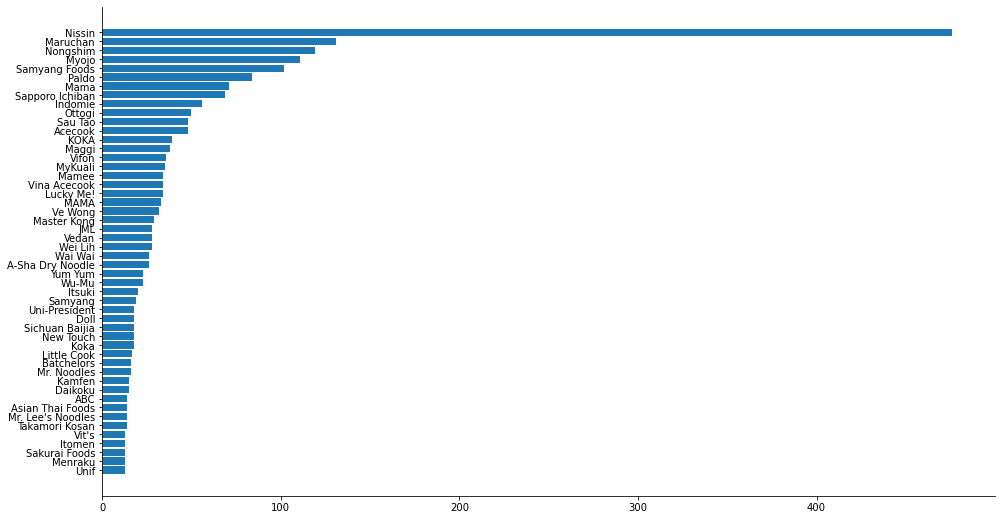

In [38]:
plt.figure(figsize=(16,9))
plt.barh(brand_count.sort_values(ascending=True).index, brand_count.sort_values(ascending = True))
#plt.xticks(rotation = 90)
sns.despine()

In [39]:
# packaging style
style_count = df['Style'].value_counts()
style_count

Pack          2085
Bowl           722
Cup            659
Tray           167
Box             54
Restaurant       3
Bar              1
Can              1
Name: Style, dtype: int64

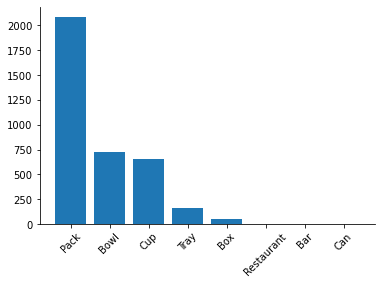

In [40]:
plt.bar(style_count.index, style_count)
plt.xticks(rotation = 45)
sns.despine()

In [41]:
# country
country_count = df['Country'].value_counts()
country_count

Japan                 681
United States         458
South Korea           411
Taiwan                372
China                 245
Thailand              212
Malaysia              207
Hong Kong             191
Indonesia             161
Singapore             140
Vietnam               124
UK                     75
Canada                 56
Philippines            51
India                  45
Mexico                 32
Germany                28
Australia              25
Brazil                 24
Netherlands            16
Nepal                  14
Myanmar                14
Bangladesh             12
Pakistan                9
Hungary                 9
Poland                  6
Colombia                6
France                  6
Cambodia                5
Sarawak                 5
Russia                  5
Fiji                    4
Holland                 4
Italy                   4
Peru                    4
Israel                  3
Dubai                   3
Sweden                  3
Finland     

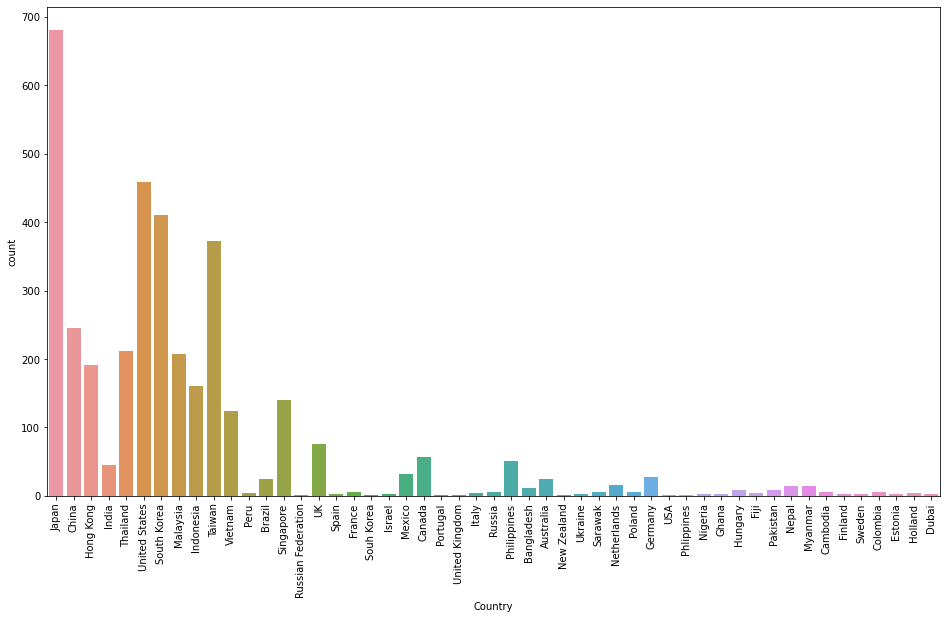

In [42]:
plt.figure(figsize = (16,9))
sns.countplot(x = 'Country', data = df)
plt.xticks(rotation = 90)
plt.show()

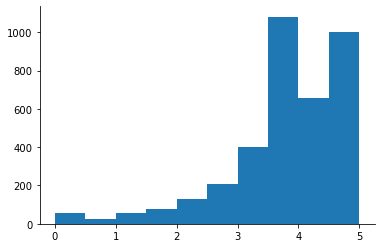

In [43]:
# examination of distribution of Stars
plt.hist(df['Stars'])
sns.despine()

Skewed data

In [44]:
df['Stars'].describe()

count    3692.000000
mean        3.722684
std         1.033759
min         0.000000
25%         3.250000
50%         3.750000
75%         4.500000
max         5.000000
Name: Stars, dtype: float64

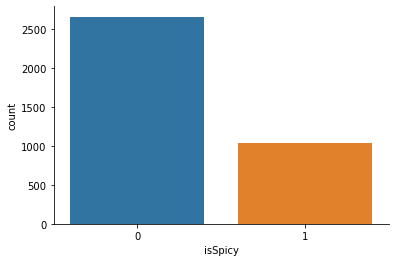

In [45]:
# distribution of Spicy
sns.countplot(x = 'isSpicy', data = df)
sns.despine()

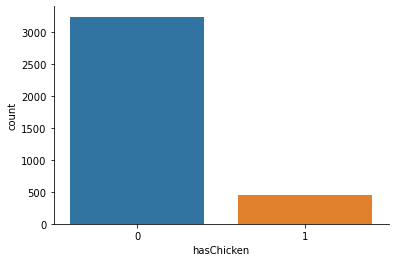

In [46]:
# distribution of Has Chicken
sns.countplot(x = 'hasChicken', data = df)
sns.despine()

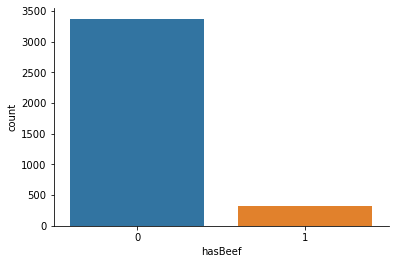

In [47]:
# distribution of Has Beef
sns.countplot(x = 'hasBeef', data = df)
sns.despine()

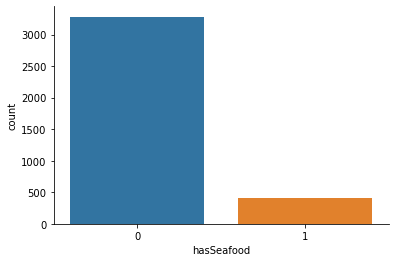

In [48]:
# distribution of Has Seafood
sns.countplot(x = 'hasSeafood', data = df)
sns.despine()

Questions:
With regards to top 20 brands with most number of products:
1. which brand has highest stars?
2. Which country has highest stars?
3. Which noodle has higher Stars - spicy or non spicy?

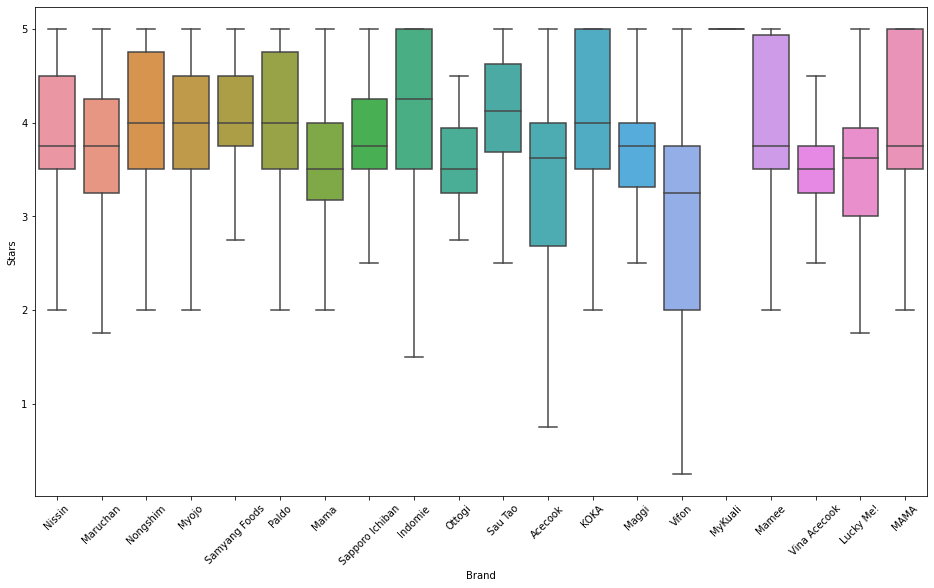

In [49]:
# Question 1
plt.figure(figsize= (16,9))
sns.boxplot(x = 'Brand', 
            y = 'Stars', 
            data= df, 
            order = brand_count.index[:20],
           showfliers = False)
plt.xticks(rotation = 45)
plt.show()

Based on score distribution, MyKuali has the highest score

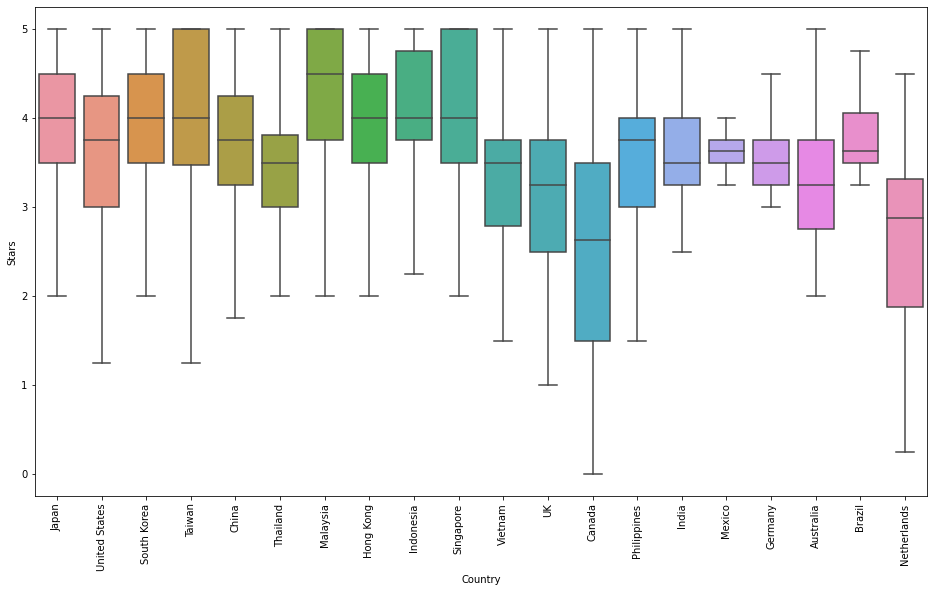

In [50]:
# Question 2
plt.figure(figsize= (16,9))
sns.boxplot(x = 'Country',
           y = 'Stars',
           data = df,
           order = country_count.index[:20],
           showfliers = False)

plt.xticks(rotation = 90)
plt.show()

Malaysia has best score

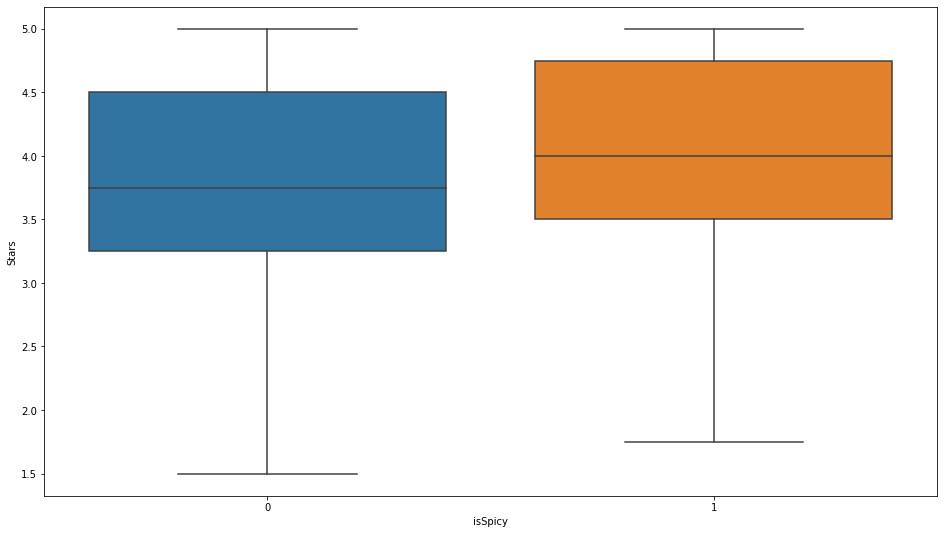

In [51]:
#Q3
plt.figure(figsize = (16,9))

sns.boxplot(x = 'isSpicy', 
            y = 'Stars', 
            data = df,
           showfliers = False)
plt.show()

Spicy noodle seems to have better score than non spicy noodle

In [52]:
# split df to spicy and non spicy
spicy_df = df[df['isSpicy']==1]
nonspicy_df = df[df['isSpicy']==0]

In [53]:
print(spicy_df.describe())
print(nonspicy_df.describe())

             Stars  isSpicy   hasChicken      hasBeef   hasSeafood
count  1035.000000   1035.0  1035.000000  1035.000000  1035.000000
mean      3.844227      1.0     0.094686     0.084058     0.146860
std       1.020249      0.0     0.292922     0.277609     0.354137
min       0.000000      1.0     0.000000     0.000000     0.000000
25%       3.500000      1.0     0.000000     0.000000     0.000000
50%       4.000000      1.0     0.000000     0.000000     0.000000
75%       4.750000      1.0     0.000000     0.000000     0.000000
max       5.000000      1.0     1.000000     1.000000     1.000000
             Stars  isSpicy   hasChicken      hasBeef   hasSeafood
count  2657.000000   2657.0  2657.000000  2657.000000  2657.000000
mean      3.675339      0.0     0.135115     0.085811     0.097102
std       1.035309      0.0     0.341910     0.280138     0.296152
min       0.000000      0.0     0.000000     0.000000     0.000000
25%       3.250000      0.0     0.000000     0.000000     0.00

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


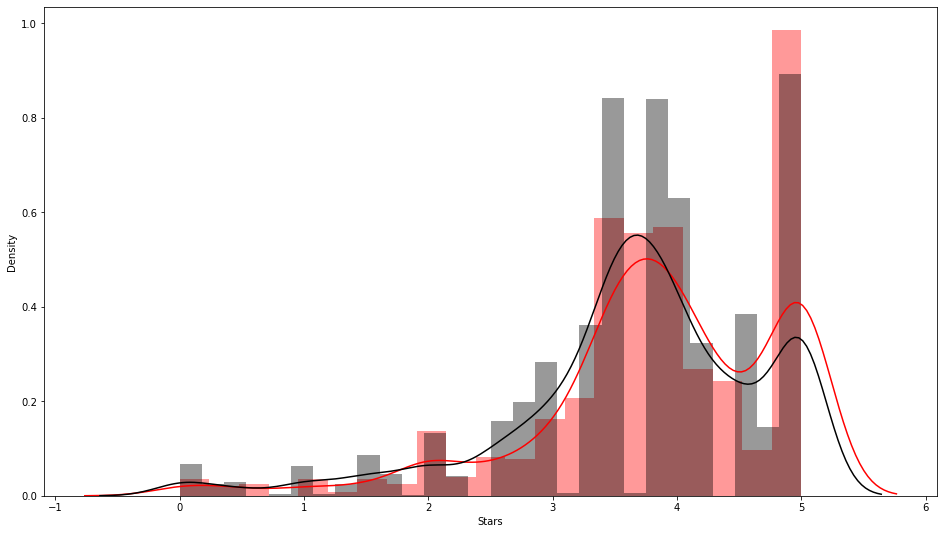

In [54]:
# statistical test
plt.figure(figsize = (16,9))
sns.distplot(spicy_df['Stars'], color = 'red')
sns.distplot(nonspicy_df['Stars'], color = 'black')
plt.show()

In [55]:
# import mann-whitney u test
from scipy.stats import mannwhitneyu
# stats test for non normally distributed quantity where t-test is not suitable

In [56]:
mannwhitneyu(spicy_df['Stars'],
            nonspicy_df['Stars'])

MannwhitneyuResult(statistic=1223389.0, pvalue=7.599166988242271e-08)

pvalue is less than 0.05. <br>
this means stars in non spicy is definitely different than spicy

In [57]:
# Check statistical significance of chicken

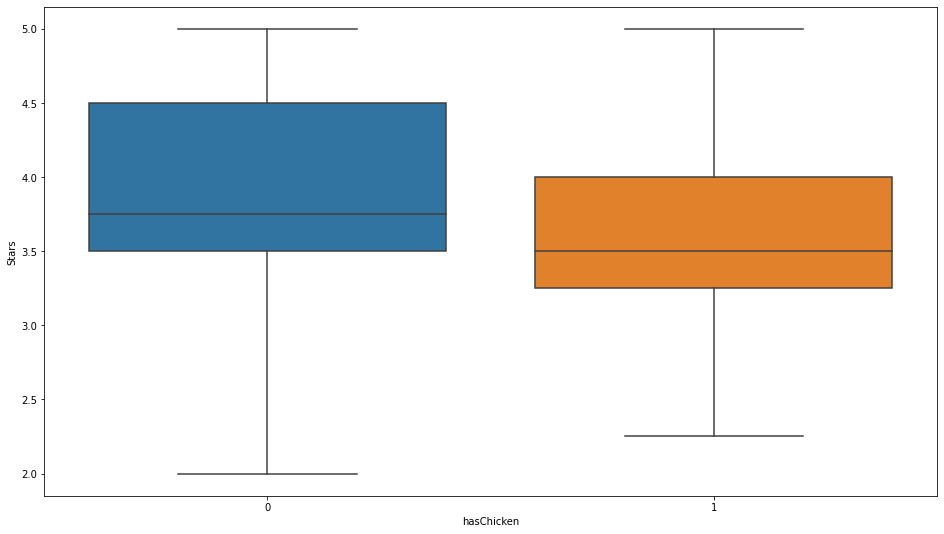

In [58]:
plt.figure(figsize = (16,9))
sns.boxplot(x = 'hasChicken', y = 'Stars', data = df, showfliers= False)
plt.show()

In [59]:
mannwhitneyu(df[df['hasChicken'] == 0]['Stars'],
            df[df['hasChicken']==1]['Stars'])

MannwhitneyuResult(statistic=619435.5, pvalue=7.731030237784803e-09)

Chicken result in statistically significant difference in score

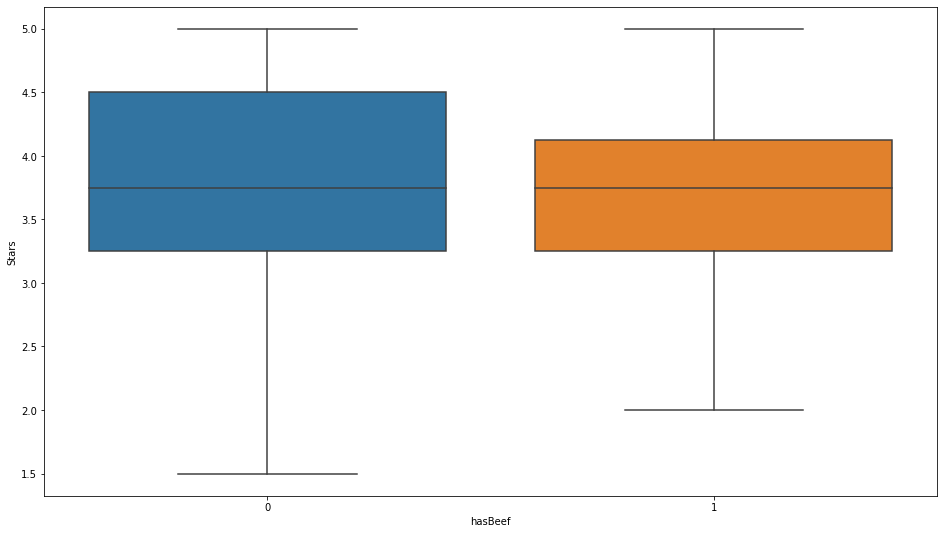

In [60]:
plt.figure(figsize = (16,9))
sns.boxplot(x = 'hasBeef', y ='Stars', data = df, showfliers= False)
plt.show()

In [61]:
mannwhitneyu(df[df['hasBeef'] == 0]['Stars'],
            df[df['hasBeef']==1]['Stars'])

MannwhitneyuResult(statistic=476842.0, pvalue=0.0010908580152179392)

Beef result in statistically significant difference in score

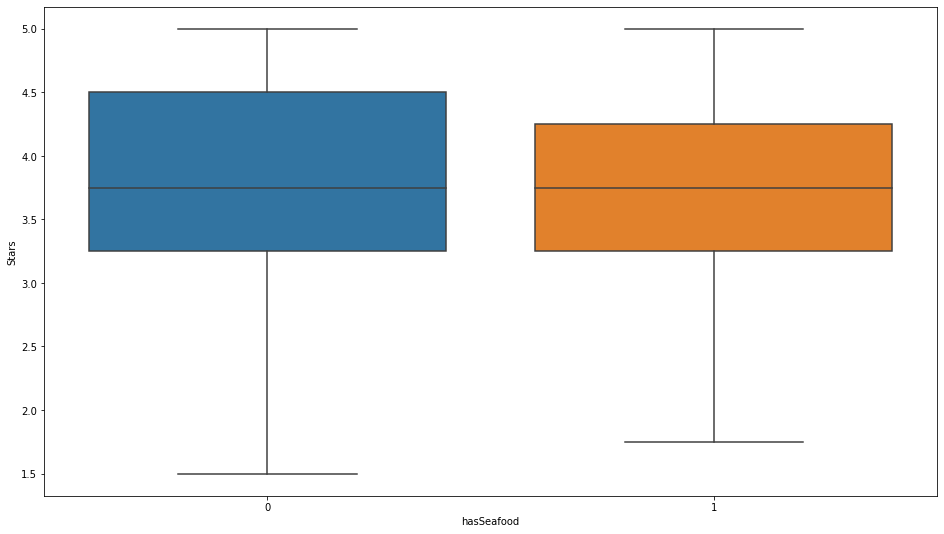

In [62]:
plt.figure(figsize = (16,9))
sns.boxplot(x = 'hasSeafood', y ='Stars', data = df, showfliers= False)
plt.show()

In [63]:
mannwhitneyu(df[df['hasSeafood'] == 0]['Stars'],
            df[df['hasSeafood']==1]['Stars'])

MannwhitneyuResult(statistic=654288.0, pvalue=0.17959325334499604)

Seafood score difference is not statistically significant

## Part III : Feature Engineering and Data Preparation

In [77]:
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


Work on brands that appear most of the time

Method 1 - using dictionary mapping then pivot

In [94]:
brand_count_dict = dict(df['Brand'].value_counts())

In [96]:
df['Brand_count'] = df['Brand']

In [97]:
df['Brand_count'] = df['Brand_count'].map(brand_count_dict)

In [102]:
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,Brand_count
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1,4
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0,2
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1,48
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0,48
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0,69
...,...,...,...,...,...,...,...,...,...,...
3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0,36
3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0,26
3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1,26
3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0,26


In [130]:
brand_count_summary = df.pivot_table(index = 'Brand', values = 'Brand_count', aggfunc = 'count')

In [176]:
brand_count_summary = brand_count_summary[brand_count_summary.Brand_count > 19].sort_values(by = 'Brand_count', ascending=False)

In [177]:
brand_count_summary.index

Index(['Nissin', 'Maruchan', 'Nongshim', 'Myojo', 'Samyang Foods', 'Paldo',
       'Mama', 'Sapporo Ichiban', 'Indomie', 'Ottogi', 'Acecook', 'Sau Tao',
       'KOKA', 'Maggi', 'Vifon', 'MyKuali', 'Mamee', 'Lucky Me!',
       'Vina Acecook', 'MAMA', 'Ve Wong', 'Master Kong', 'JML', 'Vedan',
       'Wei Lih', 'Wai Wai', 'A-Sha Dry Noodle', 'Wu-Mu', 'Yum Yum', 'Itsuki'],
      dtype='object', name='Brand')

Method 2 - using crosstab, shorter

In [171]:
top_brand = pd.crosstab(index = df['Brand'],
           columns = 'count')

top_brand = x[x['count']>19].sort_values(by = 'count', ascending = False)

In [179]:
top_brand.shape

(30, 1)

In [178]:
# create a new column called newBrand

new_brand = []

for brand in df['Brand']:
    if brand in top_brand.index:
        new_brand.append(brand)
    else:
        new_brand.append('Other')
        
df['newBrand'] = new_brand
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,Brand_count,newBrand
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1,4,Other
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0,2,Other
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1,48,Sau Tao
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0,48,Sau Tao
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0,69,Sapporo Ichiban
...,...,...,...,...,...,...,...,...,...,...,...
3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0,36,Vifon
3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0,26,Wai Wai
3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1,26,Wai Wai
3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0,26,Wai Wai


In [182]:
df['newBrand'].value_counts().shape

(31,)

In [183]:
# examine packaging style
df['Style'].value_counts()

Pack          2085
Bowl           722
Cup            659
Tray           167
Box             54
Restaurant       3
Bar              1
Can              1
Name: Style, dtype: int64

In [184]:
new_style = []

for style in df['Style']:
    if style in df['Style'].value_counts().index[:4]:
        new_style.append(style)
    else:
        new_style.append('Other')
        
df['newStyle'] = new_style
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,Brand_count,newBrand,newStyle
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1,4,Other,Pack
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0,2,Other,Cup
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1,48,Sau Tao,Pack
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0,48,Sau Tao,Pack
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0,69,Sapporo Ichiban,Cup
...,...,...,...,...,...,...,...,...,...,...,...,...
3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0,36,Vifon,Bowl
3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0,26,Wai Wai,Pack
3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1,26,Wai Wai,Pack
3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0,26,Wai Wai,Pack


In [185]:
df['newStyle'].value_counts()

Pack     2085
Bowl      722
Cup       659
Tray      167
Other      59
Name: newStyle, dtype: int64

In [192]:
# examine country

df['Country'].value_counts()

Japan                 681
United States         459
South Korea           412
Taiwan                372
China                 245
Thailand              212
Malaysia              207
Hong Kong             191
Indonesia             161
Singapore             140
Vietnam               124
UK                     75
Canada                 56
Philippines            51
India                  45
Mexico                 32
Germany                28
Australia              25
Brazil                 24
Netherlands            16
Nepal                  14
Myanmar                14
Bangladesh             12
Pakistan                9
Hungary                 9
France                  6
Poland                  6
Colombia                6
Russia                  5
Cambodia                5
Sarawak                 5
Peru                    4
Fiji                    4
Holland                 4
Italy                   4
Dubai                   3
Israel                  3
Ukraine                 3
Sweden      

Replace Souh Korea and USA to South Korea and United States

In [190]:
df['Country']  = df['Country'].replace({'Souh Korea': 'South Korea', 'USA':'United States'})

In [191]:
df['Country'].value_counts()

Japan                 681
United States         459
South Korea           412
Taiwan                372
China                 245
Thailand              212
Malaysia              207
Hong Kong             191
Indonesia             161
Singapore             140
Vietnam               124
UK                     75
Canada                 56
Philippines            51
India                  45
Mexico                 32
Germany                28
Australia              25
Brazil                 24
Netherlands            16
Nepal                  14
Myanmar                14
Bangladesh             12
Pakistan                9
Hungary                 9
France                  6
Poland                  6
Colombia                6
Russia                  5
Cambodia                5
Sarawak                 5
Peru                    4
Fiji                    4
Holland                 4
Italy                   4
Dubai                   3
Israel                  3
Ukraine                 3
Sweden      

In [193]:
len(df) * 0.8

2953.6000000000004

In [195]:
df['Country'].value_counts()[:9].sum()

2940

In [196]:
9/51*100

17.647058823529413

top 9 countries (17.5% of number of countries) account for 80% of the number of records

In [198]:
top_ten_countries = df['Country'].value_counts()[:10].index
top_ten_countries

Index(['Japan', 'United States', 'South Korea', 'Taiwan', 'China', 'Thailand',
       'Malaysia', 'Hong Kong', 'Indonesia', 'Singapore'],
      dtype='object')

In [199]:
new_country = []

for country in df['Country']:
    if country in top_ten_countries:
        new_country.append(country)
    else:
        new_country.append('Other')
        
df['newCountry'] = new_country

df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,Brand_count,newBrand,newStyle,newCountry
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1,4,Other,Pack,Japan
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0,2,Other,Cup,China
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1,48,Sau Tao,Pack,Hong Kong
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0,48,Sau Tao,Pack,Hong Kong
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0,69,Sapporo Ichiban,Cup,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0,36,Vifon,Bowl,Other
3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0,26,Wai Wai,Pack,Thailand
3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1,26,Wai Wai,Pack,Thailand
3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0,26,Wai Wai,Pack,Thailand


In [200]:
df['newCountry'].value_counts()

Japan            681
Other            612
United States    459
South Korea      412
Taiwan           372
China            245
Thailand         212
Malaysia         207
Hong Kong        191
Indonesia        161
Singapore        140
Name: newCountry, dtype: int64

In [201]:
# Create dummy variables

In [202]:
brand_dummy = pd.get_dummies(df['newBrand'], 
                             drop_first = True, 
                             prefix = "from")
brand_dummy

,from_Acecook,from_Indomie,from_Itsuki,from_JML,from_KOKA,from_Lucky Me!,from_MAMA,from_Maggi,from_Mama,from_Mamee,...,from_Sapporo Ichiban,from_Sau Tao,from_Ve Wong,from_Vedan,from_Vifon,from_Vina Acecook,from_Wai Wai,from_Wei Lih,from_Wu-Mu,from_Yum Yum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [203]:
style_dummy = pd.get_dummies(df['newStyle'], 
                             drop_first = True, 
                             prefix = 'is')
style_dummy

,is_Cup,is_Other,is_Pack,is_Tray
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
3697,0,0,0,0
3698,0,0,1,0
3699,0,0,1,0
3700,0,0,1,0


In [204]:
country_dummy = pd.get_dummies(df['newCountry'],
                              drop_first = True,
                              prefix = 'in')
country_dummy

,in_Hong Kong,in_Indonesia,in_Japan,in_Malaysia,in_Other,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States
0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3697,0,0,0,0,1,0,0,0,0,0
3698,0,0,0,0,0,0,0,0,1,0
3699,0,0,0,0,0,0,0,0,1,0
3700,0,0,0,0,0,0,0,0,1,0


In [207]:
df_temp = df.drop(['Brand', 'Variety', 'Style', 'Country', 'newBrand', 'newStyle', 'newCountry'], axis = 1)
df_temp

,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,Brand_count
0,5.0,0,0,0,1,4
1,3.5,1,0,0,0,2
2,5.0,1,0,0,1,48
3,4.5,0,0,0,0,48
4,3.5,0,0,0,0,69
...,...,...,...,...,...,...
3697,3.5,0,0,0,0,36
3698,1.0,0,0,0,0,26
3699,2.0,1,0,0,1,26
3700,2.0,1,0,0,0,26


In [210]:
df_final = pd.concat([df_temp, brand_dummy, style_dummy, country_dummy],
                    axis = 1)

In [211]:
df_final

,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,Brand_count,from_Acecook,from_Indomie,from_Itsuki,from_JML,...,in_Hong Kong,in_Indonesia,in_Japan,in_Malaysia,in_Other,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States
0,5.0,0,0,0,1,4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,3.5,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,0,0,1,48,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4.5,0,0,0,0,48,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3.5,0,0,0,0,69,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,3.5,0,0,0,0,36,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3698,1.0,0,0,0,0,26,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3699,2.0,1,0,0,1,26,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3700,2.0,1,0,0,0,26,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
